In [1]:
#importer le fichier csv
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
path="/content/drive/MyDrive/Checkpoint 3/titanic-passengers.csv"
df=pd.read_csv(path, encoding="UTF-8", sep=';')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(df)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#features extraction
x=df.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= df["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
Tree = tree.DecisionTreeClassifier()  
Tree.fit(x_train, y_train)   #fitting our model
y_pred=Tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7821229050279329


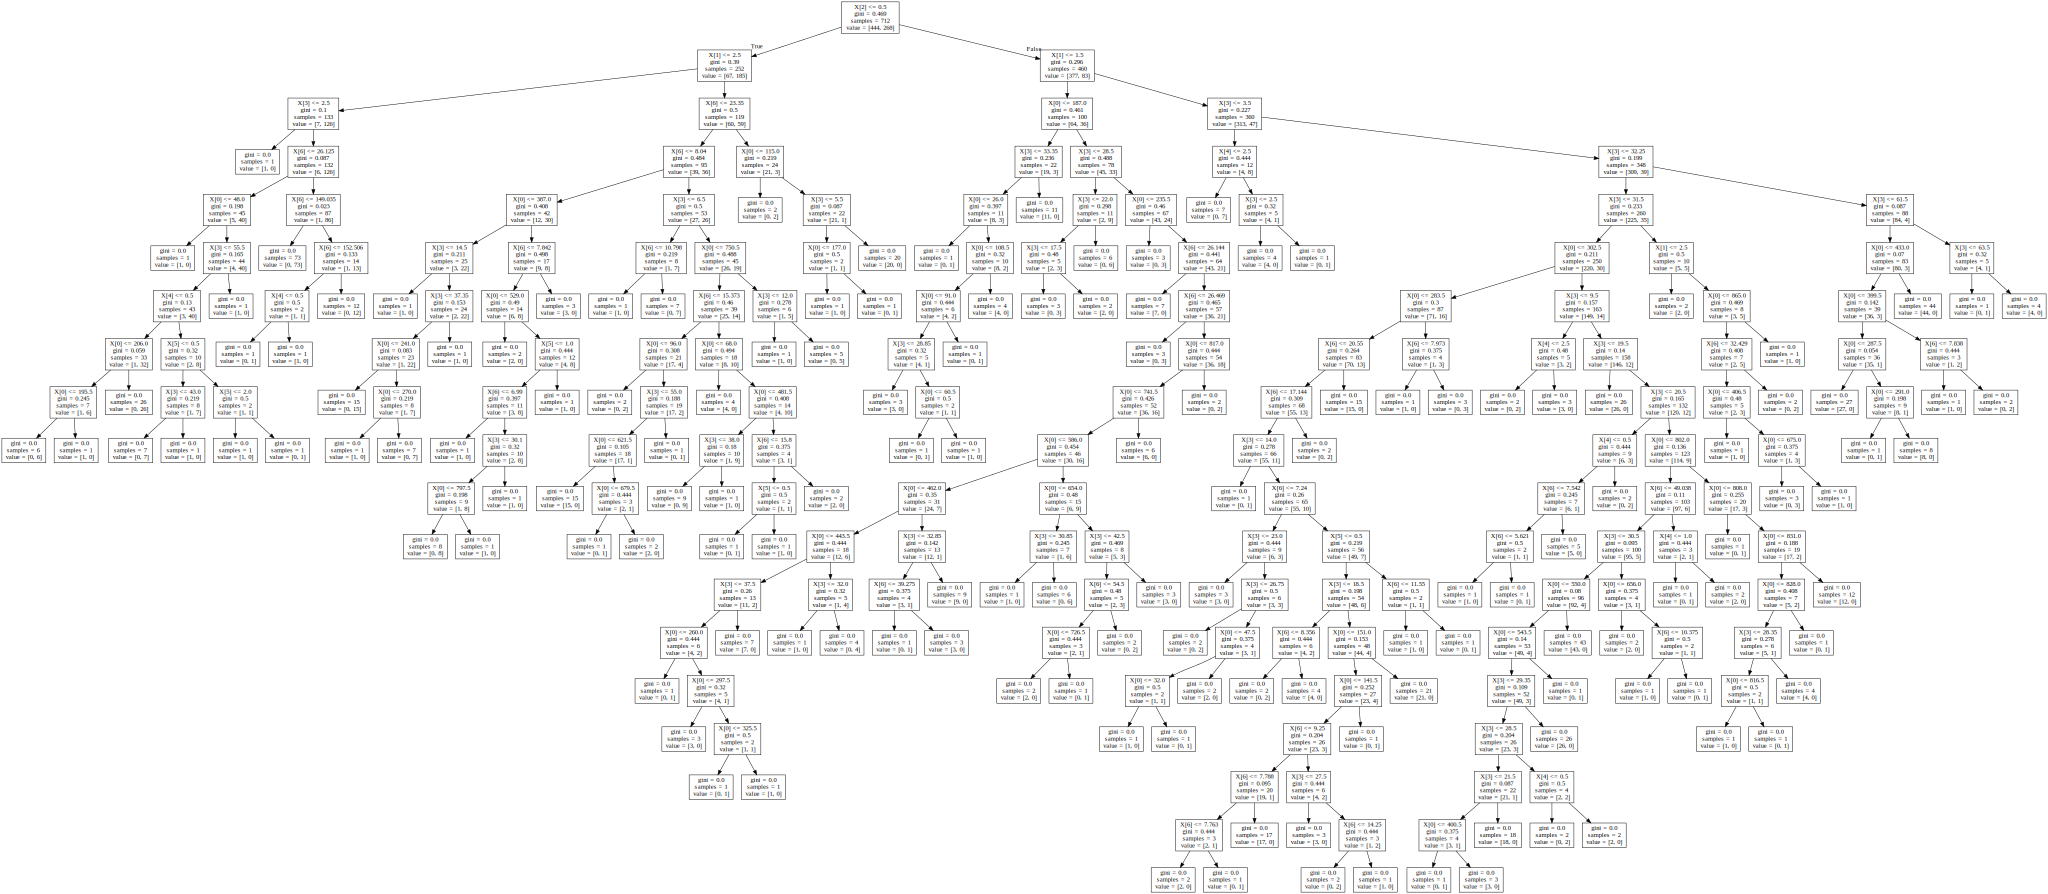

In [5]:
import graphviz

dot_data=tree.export_graphviz(Tree, out_file=None)
graph=graphviz.Source(dot_data)
graph.render("data")
graph

In [17]:
print("Accuracy Score on train data (using default params) : ",accuracy_score(y_true=y_train, y_pred=Tree.predict(x_train)))
print("Accuracy Score on the test data (using default params) : ",accuracy_score(y_true=y_test, y_pred=Tree.predict(x_test)))

Accuracy Score on train data (using default params) :  1.0
Accuracy Score on the test data (using default params) :  0.7821229050279329


In [15]:
clf=DecisionTreeClassifier(max_depth=3,min_samples_split=4)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
print("Accuracy Score on train data (using max_depth and min_sample_split) : ",accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))
print("Accuracy Score on the test data (using max_depth and min_sample_split) : ",accuracy_score(y_true=y_test, y_pred=clf.predict(x_test)))

Accuracy Score on train data (using max_depth and min_sample_split) :  0.8216292134831461
Accuracy Score on the test data (using max_depth and min_sample_split) :  0.8044692737430168


In [13]:
#We can see that accuracy on train set decreased but the accuracy of test set increased.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf1 = RandomForestClassifier(n_estimators=100)

#Train the model using the training 
clf1.fit(x_train, y_train)
y_pred=clf1.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model


Accuracy: 0.8491620111731844


In [49]:
clf1 = RandomForestClassifier(n_estimators=80)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

#The accuracy increased

Accuracy: 0.8603351955307262
